#Aldiansyah Satrio Kabisat

Dataset dapat diakses pada link berikut :

https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification/data


#Data Import

In [ ]:
from google.colab import files

files.upload()

Saving cyberbullying_tweets.csv to cyberbullying_tweets.csv


{'cyberbullying_tweets.csv': b'tweet_text,cyberbullying_type\n"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying\nWhy is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying\n@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying\n"@Jason_Gio meh. :P  thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying\n"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account.  Like Islam, it is all lies.",not_cyberbullying\n"@Raja5aab @Quickieleaks Yes, the test of god is that good or bad or indifferent or weird or whatever, it all proves gods existence.",not_cyberbullying\nItu sekolah ya bukan tempat bully! Ga jauh kaya neraka,not_cyberbullying\nKarma. I hope it bites Kat on the butt. She is just nasty. #mkr,not_cyberbullying\n@stockputout everything but mostly my priest,not_cyberbullying\nRebecca Black Dr

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
df = pd.read_csv('cyberbullying_tweets.csv')

df.head(10)

tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
5  @Raja5aab @Quickieleaks Yes, the test of god i...  not_cyberbullying
6  Itu sekolah ya bukan tempat bully! Ga jauh kay...  not_cyberbullying
7  Karma. I hope it bites Kat on the butt. She is...  not_cyberbullying
8       @stockputout everything but mostly my priest  not_cyberbullying
9  Rebecca Black Drops Out of School Due to Bully...  not_cyberbullying

#Data Analysis and Preprocessing

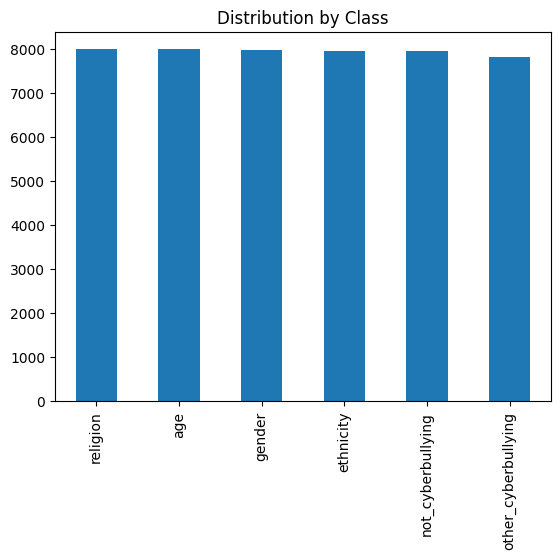

In [ ]:
ax = df['cyberbullying_type'].value_counts().plot(kind='bar')
ax.set_title("Distribution by Class")
plt.show()

# Data shows a generally balanced distribution between the classes

In [ ]:
print("Amount of row : ", df.shape[0])
print("Amount of unique row : ", len(pd.unique(df['tweet_text'])))

print('\nNull Values : ')
df.isnull().sum()

# Some duplicate data, no null data

Amount of row :  47692
Amount of unique row :  46017

Null Values : 


tweet_text            0
cyberbullying_type    0
dtype: int64

In [ ]:
df = df.drop_duplicates('tweet_text', keep=False, ignore_index=True)

In [ ]:
print("Amount of row (Post Clean) : ", df.shape[0])
print("Amount of unique row (Post Clean) : ", len(pd.unique(df['tweet_text'])))

Amount of row (Post Clean) :  44342
Amount of unique row (Post Clean) :  44342


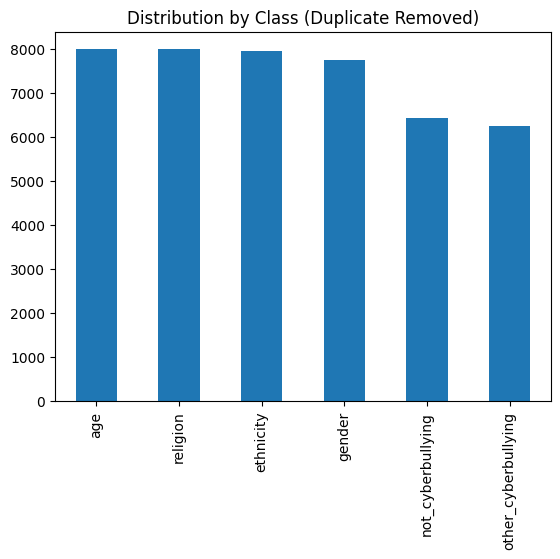

In [ ]:
ax = df['cyberbullying_type'].value_counts().plot(kind='bar')
ax.set_title("Distribution by Class (Duplicate Removed)")
plt.show()

# Removing duplicate data seems to cause minor imbalance in class distribution. Should be safe to ignore

In [ ]:
import spacy

In [ ]:
class TextCleaner:
  def __init__(self, include_stop=False, alpha_only=True, lemmatize=True):
    self.processor = spacy.load("en_core_web_sm")
    self.alpha_only = alpha_only
    self.include_stop = include_stop
    self.lemmatize = lemmatize

  def filter_token(self, token):
    if token.is_stop and not self.include_stop:
      return None

    if not token.is_alpha and self.alpha_only:
      return None

    if self.lemmatize:
      return token.lemma_.lower()

    return token.text.lower()

  def __call__(self, text):
    result = []
    tokens = self.processor(text)

    for token in tokens:
        filtered_token = self.filter_token(token)
        if filtered_token:
            result.append(filtered_token)

    if len(result) <= 0:
        result.append('<empty>')

    return ' '.join(result), len(result)

In [ ]:
def preprocess(df):
  labels = df['cyberbullying_type']
  labels = pd.get_dummies(labels)

  preprocess = TextCleaner(include_stop=True, lemmatize=True, alpha_only=True)

  docs = []
  word_count = []
  for doc in tqdm(df['tweet_text']):
    pdoc, count = preprocess(doc)
    docs.append(pdoc)
    word_count.append(count)

  result = labels
  result['label'] = df['cyberbullying_type']
  result['prep_content'] = docs
  result['word_count'] = word_count
  result['content'] = df['tweet_text']
  return result

data = preprocess(df)
data

# Preprocess each data and encode it

100%|██████████| 44342/44342 [06:59<00:00, 105.71it/s]


age  ethnicity  gender  not_cyberbullying  other_cyberbullying  \
0        0          0       0                  1                    0   
1        0          0       0                  1                    0   
2        0          0       0                  1                    0   
3        0          0       0                  1                    0   
4        0          0       0                  1                    0   
...    ...        ...     ...                ...                  ...   
44337    0          1       0                  0                    0   
44338    0          1       0                  0                    0   
44339    0          1       0                  0                    0   
44340    0          1       0                  0                    0   
44341    0          1       0                  0                    0   

       religion              label  \
0             0  not_cyberbullying   
1             0  not_cyberbullying   
2             0  not_cyberbullying   
3             0  not_cyberbullying   
4             0  not_cyberbullying   
...         ...                ...   
44337         0          ethnicity   
44338         0          ethnicity   
44339         0          ethnicity   
44340         0          ethnicity   
44341         0          ethnicity   

                                            prep_content  word_count  \
0      in other word katandandre your food be crapili...           9   
1      why be aussietv so white mkr theblock imaceleb...          13   
2              a classy whore or more red velvet cupcake           8   
3      this be an isis account pretend to be a kurdis...          17   
4      yes the test of god be that good or bad or ind...          21   
...                                                  ...         ...   
44337  black ppl be expect to do anything depend on f...          42   
44338  turner do not withhold his disappointment turn...          45   
44339  i swear to god this dumb nigger bitch i have g...          19   
44340  yea fuck you rt if youre a nigger fucking unfo...          14   
44341  bro u get to chill rt dog fuck kp that dumb ni...          14   

                                                 content  
0      In other words #katandandre, your food was cra...  
1      Why is #aussietv so white? #MKR #theblock #ImA...  
2      @XochitlSuckkks a classy whore? Or more red ve...  
3      @RudhoeEnglish This is an ISIS account pretend...  
4      @Raja5aab @Quickieleaks Yes, the test of god i...  
...                                                  ...  
44337  Black ppl aren't expected to do anything, depe...  
44338  Turner did not withhold his disappointment. Tu...  
44339  I swear to God. This dumb nigger bitch. I have...  
44340  Yea fuck you RT @therealexel: IF YOURE A NIGGE...  
44341  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...  

[44342 rows x 10 columns]

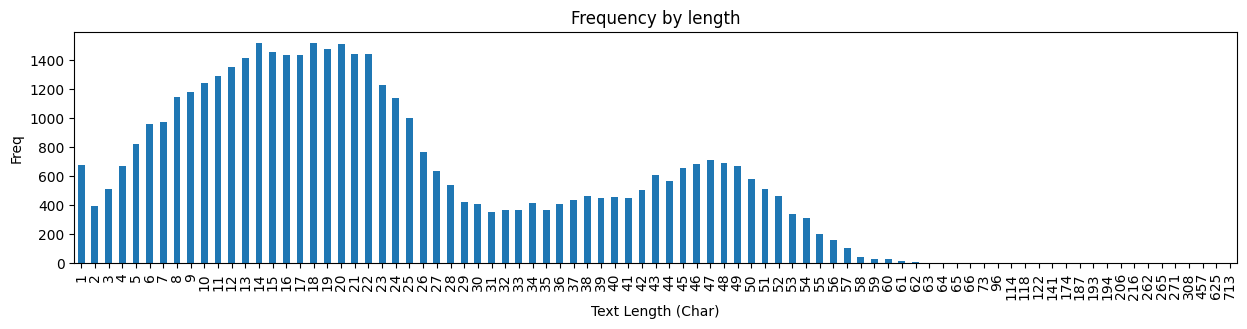

In [ ]:
ax = data['word_count'].value_counts().sort_index().plot(kind='bar', figsize=(15,3))
ax.set_title('Frequency by length')
ax.set_xlabel('Text Length (Char)')
ax.set_ylabel('Freq')
plt.show()

# Some data have outlier length (too long)

In [ ]:
# Remove data that are too short (minimal info) or too long (outlier)

data = data[(data['word_count'] >= 3) & (data['word_count'] <= 57)]

In [ ]:
# Remove data with other_cyberbullying label (potentially ambiguous)

data = data[data["label"] != "other_cyberbullying"]
data.drop('other_cyberbullying', axis=1)

age  ethnicity  gender  not_cyberbullying  religion              label  \
0        0          0       0                  1         0  not_cyberbullying   
1        0          0       0                  1         0  not_cyberbullying   
2        0          0       0                  1         0  not_cyberbullying   
3        0          0       0                  1         0  not_cyberbullying   
4        0          0       0                  1         0  not_cyberbullying   
...    ...        ...     ...                ...       ...                ...   
44337    0          1       0                  0         0          ethnicity   
44338    0          1       0                  0         0          ethnicity   
44339    0          1       0                  0         0          ethnicity   
44340    0          1       0                  0         0          ethnicity   
44341    0          1       0                  0         0          ethnicity   

                                            prep_content  word_count  \
0      in other word katandandre your food be crapili...           9   
1      why be aussietv so white mkr theblock imaceleb...          13   
2              a classy whore or more red velvet cupcake           8   
3      this be an isis account pretend to be a kurdis...          17   
4      yes the test of god be that good or bad or ind...          21   
...                                                  ...         ...   
44337  black ppl be expect to do anything depend on f...          42   
44338  turner do not withhold his disappointment turn...          45   
44339  i swear to god this dumb nigger bitch i have g...          19   
44340  yea fuck you rt if youre a nigger fucking unfo...          14   
44341  bro u get to chill rt dog fuck kp that dumb ni...          14   

                                                 content  
0      In other words #katandandre, your food was cra...  
1      Why is #aussietv so white? #MKR #theblock #ImA...  
2      @XochitlSuckkks a classy whore? Or more red ve...  
3      @RudhoeEnglish This is an ISIS account pretend...  
4      @Raja5aab @Quickieleaks Yes, the test of god i...  
...                                                  ...  
44337  Black ppl aren't expected to do anything, depe...  
44338  Turner did not withhold his disappointment. Tu...  
44339  I swear to God. This dumb nigger bitch. I have...  
44340  Yea fuck you RT @therealexel: IF YOURE A NIGGE...  
44341  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...  

[37481 rows x 9 columns]

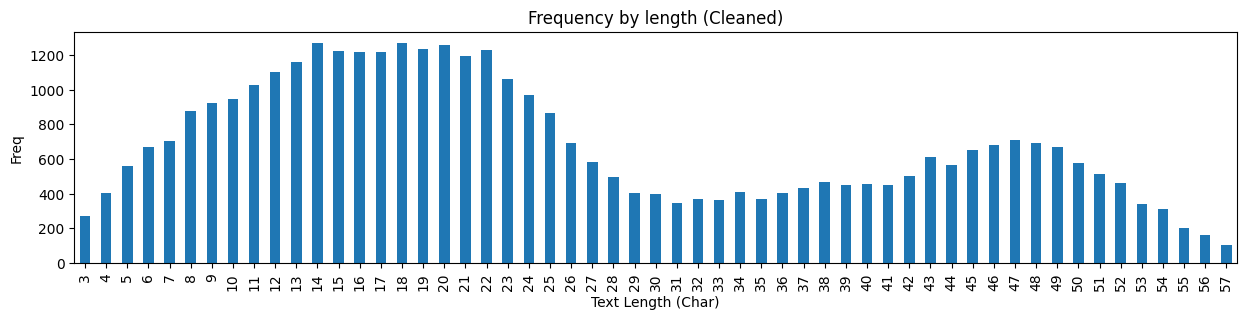

In [ ]:
ax = data['word_count'].value_counts().sort_index().plot(kind='bar', figsize=(15,3))
ax.set_title('Frequency by length (Cleaned)')
ax.set_xlabel('Text Length (Char)')
ax.set_ylabel('Freq')
plt.show()

# Good data distribution with 2 peak

In [ ]:
text = data['prep_content'].to_numpy()
label = data[['age', 'ethnicity', 'gender', 'religion', 'not_cyberbullying']].to_numpy()

In [ ]:
# Post train (Final data size)

print('Final data size : ', len(data))

Final data size :  37481


In [ ]:
from sklearn.model_selection import train_test_split

text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2)

#Tokenization

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(oov_token='<oov>')
tokenizer.fit_on_texts(text_train)

train_sequence = tokenizer.texts_to_sequences(text_train)
test_sequence = tokenizer.texts_to_sequences(text_test)

padded_train = pad_sequences(train_sequence, padding='post', maxlen=57)
padded_test = pad_sequences(test_sequence, padding='post', maxlen=57)

vocab_size = len(tokenizer.word_index) + 2 # Accounting for OOV and padding
print(vocab_size)

28659


In [ ]:
idx = 10
print(padded_train[idx])
print(label_train[idx])

# Data check

[  43  124  107 2607    6  435    3 1101    7   58  991   86   70    2
 1039 1262  388   52   94   57   47   81   87    2  128   92  143 1235
   38   89    6  825   55   94  255   19    3  198  273    4 1989    8
   17   81   13  139    0    0    0    0    0    0    0    0    0    0
    0]
[0 0 0 1 0]


#Model Compilation and Training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import Callback

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

class TargetAccuracy(Callback):
    def __init__(self, target_acc):
        super(TargetAccuracy, self).__init__()
        self.target_acc = target_acc

    def on_epoch_end(self, epoch, logs=None):
        current_train_acc = logs.get('accuracy')
        current_val_acc = logs.get('val_accuracy')

        if current_train_acc >= self.target_acc and current_val_acc >= self.target_acc:
            print(f"\nTarget training and validation accuracy ({self.target_acc}) reached. Stopping training.")
            self.model.stop_training = True

target_accuracy = TargetAccuracy(.90)

In [ ]:
import tensorflow as tf

regularizer = tf.keras.regularizers.l2(0.01)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, output_dim=100, input_length=57),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, kernel_regularizer=regularizer)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation='swish', kernel_regularizer=regularizer),
    tf.keras.layers.Dense(8, activation='swish', kernel_regularizer=regularizer),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-3, weight_decay=2e-6),
    metrics=['accuracy'])

In [ ]:
num_epochs = 15
history = model.fit(
    padded_train,
    label_train,
    validation_data=(padded_test, label_test),
    callbacks=[target_accuracy, early_stopping],
    batch_size=32,
    epochs=num_epochs)

Epoch 1/15
937/937 [==============================] - 45s 42ms/step - loss: 1.2328 - accuracy: 0.5576 - val_loss: 0.6787 - val_accuracy: 0.8442
Epoch 2/15
937/937 [==============================] - 12s 13ms/step - loss: 0.5188 - accuracy: 0.8949 - val_loss: 0.4849 - val_accuracy: 0.8962
Epoch 3/15
937/937 [==============================] - 11s 12ms/step - loss: 0.3751 - accuracy: 0.9297 - val_loss: 0.4545 - val_accuracy: 0.8970
Epoch 4/15
933/937 [============================>.] - ETA: 0s - loss: 0.3106 - accuracy: 0.9466
Target training and validation accuracy (0.9) reached. Stopping training.
937/937 [==============================] - 13s 13ms/step - loss: 0.3104 - accuracy: 0.9467 - val_loss: 0.4307 - val_accuracy: 0.9068


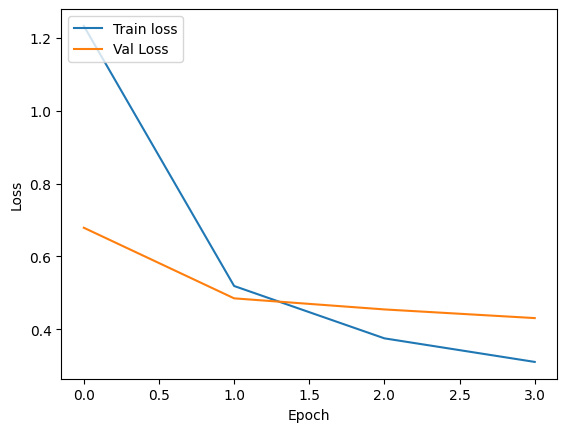

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Val Loss'], loc='upper left')
plt.show()

# Graph showed minor sign of overfitting

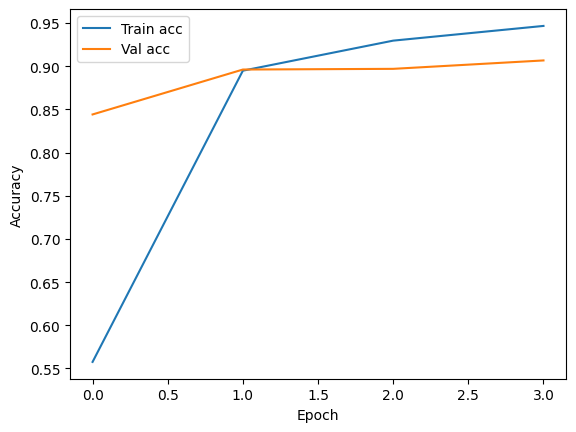

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train acc', 'Val acc'], loc='upper left')
plt.show()

# Graph showed sign of accuracy convergence and good generalization performance

In [ ]:
model.save('./trained-nlp')

In [ ]:
!zip -r trained-nlp.zip ./trained-nlp

  adding: trained-nlp/ (stored 0%)
  adding: trained-nlp/assets/ (stored 0%)
  adding: trained-nlp/variables/ (stored 0%)
  adding: trained-nlp/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: trained-nlp/variables/variables.index (deflated 64%)
  adding: trained-nlp/saved_model.pb (deflated 90%)
  adding: trained-nlp/fingerprint.pb (stored 0%)
  adding: trained-nlp/keras_metadata.pb (deflated 91%)
